In [79]:
import pandas as pd 
import numpy as np

In [80]:
# 결제 금액 데이터
purchase = pd.read_csv('capston/purchaseWM.csv')

In [81]:
# 결제 건수 데이터 
buy = pd.read_csv('capston/buyData.csv')

## 1. EDA처리

In [82]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년월      9813 non-null   object
 1   성별코드    9813 non-null   object
 2   가맹점업종명  9813 non-null   object
 3   총결제금액   9813 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 306.8+ KB


In [83]:
buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5538 entries, 0 to 5537
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   이용일자        5538 non-null   object
 1   업종대분류       5538 non-null   object
 2   카드결제건수(천건)  5538 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 129.9+ KB


In [84]:
purchase.isnull().sum()

년월        0
성별코드      0
가맹점업종명    0
총결제금액     0
dtype: int64

In [85]:
buy.isnull().sum()

이용일자          0
업종대분류         0
카드결제건수(천건)    0
dtype: int64

In [86]:
purchase['년월'].value_counts()

2019년 9월    1899
2019년 8월    1804
2019년 7월    1793
2019년 6월    1697
2019년 5월    1502
2019년 4월    1116
2019년 3월       2
Name: 년월, dtype: int64

In [87]:
buy['이용일자'].value_counts()

2019-03    403
2019-07    403
2019-08    403
2020-05    403
2020-03    403
2020-01    403
2019-05    403
2019-01    402
2020-06    391
2020-04    390
2019-06    390
2019-04    390
2020-02    377
2019-02    364
2019-09     13
Name: 이용일자, dtype: int64

1. 가맹정 업종명 확인

In [88]:
purchase['가맹점업종명'].unique()

array(['유통업 영리', '일반휴게음식', '회원제형태', '기타', '신변잡화', '음료식품', '의원', '레저업소',
       '문화.취미', '보건위생', '연료판매점', '유통업 비영리', '서적문구', '약국', '자동차정비 유지',
       '수리서비스', '의류', '학원', '용역 서비스', '레져용품', '기타의료기관', '주방용구', '사무통신',
       '건강식품', '건축자재', '가구', '광학제품', '여행', '직물', '병원', '농업', '전기제품',
       '숙박업', '자동차판매'], dtype=object)

In [89]:
buy['업종대분류'].unique()

array(['가전/가구', '가정생활/서비스', '교육/학원', '미용', '스포츠/문화/레저', '여행/교통', '요식/유흥',
       '유통', '음/식료품', '의료', '자동차', '주유', '패션/잡화'], dtype=object)

2. describe 기술 통계

In [90]:
purchase.describe(include = ['object','category'])

,년월,성별코드,가맹점업종명
count,9813,9813,9813
unique,7,2,34
top,2019년 9월,M,일반휴게음식
freq,1899,4951,412


In [91]:
purchase.describe()

,총결제금액
count,9.813000e+03
mean,6.775770e+06
std,2.471448e+07
min,1.000000e+01
25%,1.260000e+05
50%,6.500000e+05
75%,3.203540e+06
max,6.350110e+08


In [92]:
buy.describe(include = ['object','category'])

,이용일자,업종대분류
count,5538,5538
unique,15,13
top,2019-03,의료
freq,403,426


In [93]:
buy.describe()

,카드결제건수(천건)
count,5538.000000
mean,2652.314012
std,4164.349099
min,37.000000
25%,357.000000
50%,587.500000
75%,2156.750000
max,16650.000000


3. 업종열 이름 합치기

In [94]:
# 바꾸지 않은 것: 회원제 형태, 기타, 연료판매점, 서적문구, 
#수리 서비스, 학원, 용역 서비스, 주방용구(바꾸긴 했으나 보류), 사무통신, 건축자재, 광학제품, 직물, 농업
# 직물, 농업 -> 농업으로 묶을까 생각중입니다. 
purchase.loc[purchase["가맹점업종명"] == '유통업 영리', "가맹점업종명"] = "유통"
purchase.loc[purchase["가맹점업종명"] == '일반휴게음식', "가맹점업종명"] = "요식/유흥"
purchase.loc[purchase["가맹점업종명"] == '신변잡화', "가맹점업종명"] = "패션/잡화"
purchase.loc[purchase["가맹점업종명"] == '음료식품', "가맹점업종명"] = "의료"
purchase.loc[purchase["가맹점업종명"] == '의원', "가맹점업종명"] = "요식/유흥"
purchase.loc[purchase["가맹점업종명"] == '레저업소', "가맹점업종명"] = "스포츠/문화/레저"
purchase.loc[purchase["가맹점업종명"] == '문화.취미', "가맹점업종명"] = "스포츠/문화/레저"
purchase.loc[purchase["가맹점업종명"] == '보건위생', "가맹점업종명"] = "의료"
purchase.loc[purchase["가맹점업종명"] == '유통업 비영리', "가맹점업종명"] = "유통"
purchase.loc[purchase["가맹점업종명"] == '약국', "가맹점업종명"] = "의료"
purchase.loc[purchase["가맹점업종명"] == '자동차정비 유지', "가맹점업종명"] = "자동차"
purchase.loc[purchase["가맹점업종명"] == '의류', "가맹점업종명"] = "패션/잡화"
purchase.loc[purchase["가맹점업종명"] == '레져용품', "가맹점업종명"] = "패션/잡화"
purchase.loc[purchase["가맹점업종명"] == '주방용구', "가맹점업종명"] = "가전/가구"
purchase.loc[purchase["가맹점업종명"] == '기타의료기관', "가맹점업종명"] = "의료"
purchase.loc[purchase["가맹점업종명"] == '건강식품', "가맹점업종명"] = "음/식료품"
purchase.loc[purchase["가맹점업종명"] == '가구', "가맹점업종명"] = "가전/가구"
purchase.loc[purchase["가맹점업종명"] == '여행', "가맹점업종명"] = "여행/교통"
purchase.loc[purchase["가맹점업종명"] == '병원', "가맹점업종명"] = "의료"
purchase.loc[purchase["가맹점업종명"] == '숙박업', "가맹점업종명"] = "요식/유흥"
purchase.loc[purchase["가맹점업종명"] == '자동차판매', "가맹점업종명"] = "자동차"
purchase

,년월,성별코드,가맹점업종명,총결제금액
0,2019년 3월,F,유통,7600
1,2019년 3월,F,요식/유흥,26200
2,2019년 4월,F,회원제형태,10000
3,2019년 4월,F,기타,10450
4,2019년 4월,F,패션/잡화,45500
...,...,...,...,...
9808,2019년 9월,M,요식/유흥,58204170
9809,2019년 9월,M,유통,64712145
9810,2019년 9월,M,의료,65248911
9811,2019년 9월,M,학원,265314290


In [95]:
purchase['성별코드'] =  purchase['성별코드'].astype('category')
purchase['가맹점업종명'] =  purchase['가맹점업종명'].astype('category')
buy['업종대분류'] = buy['업종대분류'].astype('category')

In [96]:
purchase['가맹점업종명'].unique()

['유통', '요식/유흥', '회원제형태', '기타', '패션/잡화', ..., '광학제품', '여행/교통', '직물', '농업', '전기제품']
Length: 22
Categories (22, object): ['유통', '요식/유흥', '회원제형태', '기타', ..., '여행/교통', '직물', '농업', '전기제품']

In [97]:
buy['업종대분류'].unique()

['가전/가구', '가정생활/서비스', '교육/학원', '미용', '스포츠/문화/레저', ..., '음/식료품', '의료', '자동차', '주유', '패션/잡화']
Length: 13
Categories (13, object): ['가전/가구', '가정생활/서비스', '교육/학원', '미용', ..., '의료', '자동차', '주유', '패션/잡화']

In [98]:
purchase.describe(include = 'object')

,년월
count,9813
unique,7
top,2019년 9월
freq,1899


In [99]:
buy.describe(include = 'object')

,이용일자
count,5538
unique,15
top,2019-03
freq,403


4. seaborn로 데이터셋 살펴보기

In [100]:
import seaborn as sns

<AxesSubplot:xlabel='가맹점업종명', ylabel='총결제금액'>

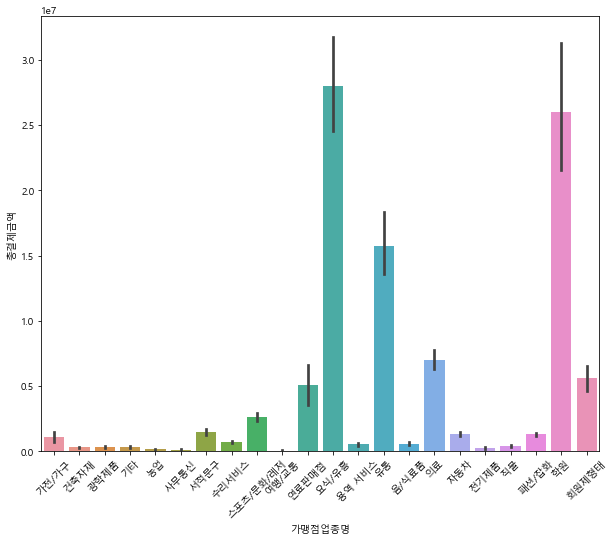

In [105]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation = 45)

sns.barplot(x='가맹점업종명', y='총결제금액', data=purchase)

In [78]:
purchase['성별코드'] =  purchase['성별코드'].astype('category')
purchase['가맹점업종명'] =  purchase['가맹점업종명'].astype('category')
buy['업종대분류'] = buy['업종대분류'].astype('category')

<AxesSubplot:xlabel='가맹점업종명', ylabel='총결제금액'>

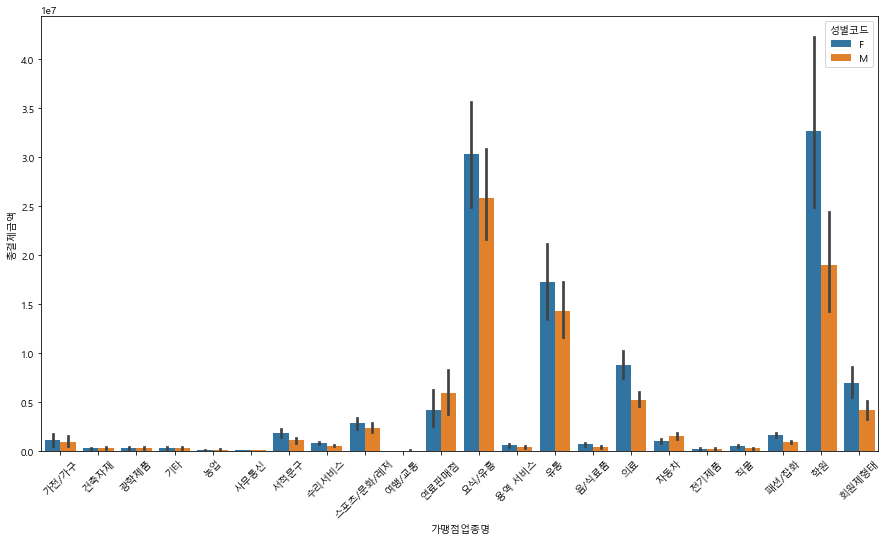

In [102]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.figure(figsize=(15, 8))
plt.xticks(rotation = 45)

sns.barplot(x='가맹점업종명', y='총결제금액', hue = '성별코드', data=purchase)

In [93]:
pd.crosstab(purchase.성별코드,purchase.가맹점업종명).T

성별코드,F,M
가맹점업종명,,
가전/가구,219,195
건축자재,125,157
광학제품,146,146
기타,136,163
농업,79,103
사무통신,126,123
서적문구,182,180
수리서비스,182,183
스포츠/문화/레저,366,365


<AxesSubplot:xlabel='업종대분류', ylabel='카드결제건수(천건)'>

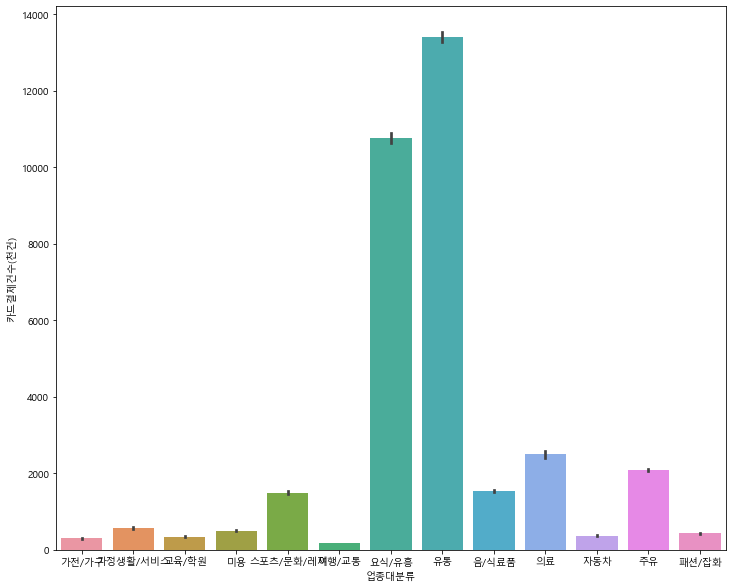

In [95]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.figure(figsize=(12, 10))

sns.barplot(x='업종대분류', y='카드결제건수(천건)', data=buy)

C:\Users\dajin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


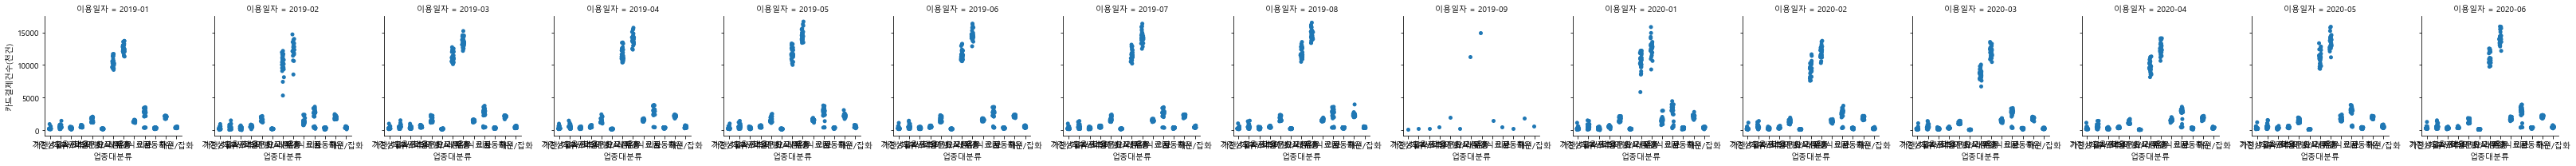

In [96]:
grid = sns.FacetGrid(data=buy, col='이용일자')
grid.map(sns.stripplot, "업종대분류", "카드결제건수(천건)")

## 2. 데이터 분석

1. 남녀별 소비 업종 상관 분석 

In [99]:
from sklearn.metrics import matthews_corrcoef

label = purchase["성별코드"].values
market = purchase["가맹점업종명"].values

y_true = label
y_pred = market
matthews_corrcoef(y_true, y_pred)

0.0

2. 소비 업종 결제건수 데이터(buy)와 소비 업종 결제금액 데이터(purchase) 분석

- purchase 매달 마다 가맹점 업종별 총 결제금액 알아보기

In [100]:
#성별코드가 필요없어졌으므로 그 열을 뺀 purchase 데이터 프레임을 씀.

ph = purchase[['년월','가맹점업종명','총결제금액']]
ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   년월      9813 non-null   object  
 1   가맹점업종명  9813 non-null   category
 2   총결제금액   9813 non-null   int64   
dtypes: category(1), int64(1), object(1)
memory usage: 163.8+ KB


In [101]:
nine_mar = ph["년월"] == "2019년 3월"
nine_mar = ph[nine_mar]
#nine_mar

,년월,가맹점업종명,총결제금액
0,2019년 3월,유통,7600
1,2019년 3월,요식/유흥,26200


In [102]:
nine_apr = ph["년월"] == "2019년 4월"
nine_apr = ph[nine_apr]

na=nine_apr['총결제금액'].groupby(nine_apr['가맹점업종명']).agg(['sum'])
#na
na.sort_values('sum',ascending=False)

,sum
가맹점업종명,
요식/유흥,579546046
의료,213991472
유통,149783445
학원,131004304
패션/잡화,42597886
스포츠/문화/레저,35592886
회원제형태,23631404
연료판매점,18683219
자동차,12011470


In [103]:
nine_may = ph["년월"] == "2019년 5월"
nine_may = ph[nine_may]
nine_may

nm=nine_may['총결제금액'].groupby(nine_may['가맹점업종명']).agg(['sum'])
#nm
nm.sort_values('sum',ascending=False)

,sum
가맹점업종명,
요식/유흥,2152922674
의료,809500725
유통,612305371
학원,515839440
패션/잡화,144185116
스포츠/문화/레저,137214668
회원제형태,93521580
연료판매점,81414439
자동차,45396471


In [104]:
nine_jun = ph["년월"] == "2019년 6월"
nine_jun = ph[nine_jun]
nine_jun

nj=nine_jun['총결제금액'].groupby(nine_jun['가맹점업종명']).agg(['sum'])
#nj
nj.sort_values('sum',ascending=False)

,sum
가맹점업종명,
요식/유흥,3919003201
의료,1543389630
유통,1294927535
학원,1028266412
스포츠/문화/레저,248963768
패션/잡화,221891245
회원제형태,195758448
연료판매점,179844834
자동차,72844569


In [105]:
nine_jul = ph["년월"] == "2019년 7월"
nine_jul = ph[nine_jul]
nine_jul

njl=nine_jul['총결제금액'].groupby(nine_jul['가맹점업종명']).agg(['sum'])
#njl
njl.sort_values('sum',ascending=False)

,sum
가맹점업종명,
요식/유흥,6157763432
의료,2358276737
유통,1921697911
학원,1739910780
스포츠/문화/레저,386717807
회원제형태,361814285
연료판매점,278993747
패션/잡화,278630078
서적문구,126309508


In [106]:
nine_aug = ph["년월"] == "2019년 8월"
nine_aug = ph[nine_aug]
nine_aug
nau=nine_aug['총결제금액'].groupby(nine_aug['가맹점업종명']).agg(['sum'])
#nau
nau.sort_values('sum',ascending=False)

,sum
가맹점업종명,
요식/유흥,5792323007
의료,2354370567
학원,2097032814
유통,1786416848
회원제형태,422836245
스포츠/문화/레저,416570896
연료판매점,274915429
패션/잡화,226380676
가전/가구,148034222


In [107]:
nine_sep = ph["년월"] == "2019년 9월"
nine_sep = ph[nine_sep]
nine_sep

ns=nine_sep['총결제금액'].groupby(nine_sep['가맹점업종명']).agg(['sum'])
#ns
ns.sort_values('sum',ascending=False)

,sum
가맹점업종명,
요식/유흥,9114176352
의료,4366652462
학원,3872577109
유통,3006318771
회원제형태,785627949
스포츠/문화/레저,689520899
패션/잡화,468166960
연료판매점,435696109
서적문구,185969605


- buy 매달 마다 가맹점 업종별 총 결제금액 알아보기

In [108]:
buy1 = buy[['이용일자','업종대분류','카드결제건수(천건)']]
buy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5538 entries, 0 to 5537
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   이용일자        5538 non-null   object  
 1   업종대분류       5538 non-null   category
 2   카드결제건수(천건)  5538 non-null   int64   
dtypes: category(1), int64(1), object(1)
memory usage: 92.8+ KB


In [109]:
buy2= buy1['이용일자']== '2019-03'
buy2 = buy1[buy2]
buy2.info()
b3=buy2['카드결제건수(천건)'].groupby(buy2['업종대분류']).agg('sum')
b3=pd.DataFrame(b3)
b3.sort_values('카드결제건수(천건)',ascending=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 766 to 1168
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   이용일자        403 non-null    object  
 1   업종대분류       403 non-null    category
 2   카드결제건수(천건)  403 non-null    int64   
dtypes: category(1), int64(1), object(1)
memory usage: 10.6+ KB


,카드결제건수(천건)
업종대분류,
유통,418979
요식/유흥,347874
의료,74463
주유,64641
스포츠/문화/레저,49866
음/식료품,45405
미용,17662
가정생활/서비스,17457
패션/잡화,14191


In [110]:
buy4= buy1['이용일자']== '2019-04'
buy4 = buy1[buy4]
buy4.info()
b4=buy4['카드결제건수(천건)'].groupby(buy4['업종대분류']).agg('sum')
b4=pd.DataFrame(b4)
b4.sort_values('카드결제건수(천건)',ascending=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1169 to 1558
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   이용일자        390 non-null    object  
 1   업종대분류       390 non-null    category
 2   카드결제건수(천건)  390 non-null    int64   
dtypes: category(1), int64(1), object(1)
memory usage: 10.2+ KB


,카드결제건수(천건)
업종대분류,
유통,419830
요식/유흥,348014
의료,81791
주유,64776
음/식료품,47114
스포츠/문화/레저,44679
가정생활/서비스,17862
미용,16203
패션/잡화,14090


In [124]:
buy5= buy1['이용일자']== '2019-05'
buy5 = buy1[buy5]
#buy5.info()
b5=buy5['카드결제건수(천건)'].groupby(buy5['업종대분류']).agg('sum')
b5=pd.DataFrame(b5)
b5.sort_values('카드결제건수(천건)',ascending=False)

,카드결제건수(천건)
업종대분류,
유통,452138
요식/유흥,364910
의료,80200
주유,69059
스포츠/문화/레저,50687
음/식료품,49905
가정생활/서비스,18476
패션/잡화,17012
미용,16702


In [112]:
buy6= buy1['이용일자']== '2019-06'
buy6 = buy1[buy6]
buy6.info()
b6=buy6['카드결제건수(천건)'].groupby(buy6['업종대분류']).agg('sum')
b6=pd.DataFrame(b6)
b6.sort_values('카드결제건수(천건)',ascending=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1962 to 2351
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   이용일자        390 non-null    object  
 1   업종대분류       390 non-null    category
 2   카드결제건수(천건)  390 non-null    int64   
dtypes: category(1), int64(1), object(1)
memory usage: 10.2+ KB


,카드결제건수(천건)
업종대분류,
유통,438839
요식/유흥,348893
의료,70823
주유,65602
스포츠/문화/레저,49461
음/식료품,47945
가정생활/서비스,17106
미용,15802
패션/잡화,15341


In [113]:
buy7= buy1['이용일자']== '2019-07'
buy7 = buy1[buy7]
buy7.info()
b7=buy7['카드결제건수(천건)'].groupby(buy7['업종대분류']).agg('sum')
b7=pd.DataFrame(b7)
b7.sort_values('카드결제건수(천건)',ascending=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 2352 to 2754
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   이용일자        403 non-null    object  
 1   업종대분류       403 non-null    category
 2   카드결제건수(천건)  403 non-null    int64   
dtypes: category(1), int64(1), object(1)
memory usage: 10.6+ KB


,카드결제건수(천건)
업종대분류,
유통,446883
요식/유흥,355593
의료,77067
주유,68725
스포츠/문화/레저,51936
음/식료품,46949
가정생활/서비스,17371
미용,15771
패션/잡화,15350


In [114]:
buy8= buy1['이용일자']== '2019-08'
buy8 = buy1[buy8]
buy8.info()
b8=buy8['카드결제건수(천건)'].groupby(buy8['업종대분류']).agg('sum')
b8=pd.DataFrame(b8)
b8.sort_values('카드결제건수(천건)',ascending=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 2755 to 3157
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   이용일자        403 non-null    object  
 1   업종대분류       403 non-null    category
 2   카드결제건수(천건)  403 non-null    int64   
dtypes: category(1), int64(1), object(1)
memory usage: 10.6+ KB


,카드결제건수(천건)
업종대분류,
유통,455680
요식/유흥,368828
주유,74509
의료,74426
스포츠/문화/레저,56291
음/식료품,49331
가정생활/서비스,17517
미용,15872
패션/잡화,13854


In [115]:
buy9= buy1['이용일자']== '2019-09'
buy9 = buy1[buy9]
buy9.info()
b9=buy9['카드결제건수(천건)'].groupby(buy9['업종대분류']).agg('sum')
b9=pd.DataFrame(b9)
b9.sort_values('카드결제건수(천건)',ascending=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 3158 to 3170
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   이용일자        13 non-null     object  
 1   업종대분류       13 non-null     category
 2   카드결제건수(천건)  13 non-null     int64   
dtypes: category(1), int64(1), object(1)
memory usage: 1.0+ KB


,카드결제건수(천건)
업종대분류,
유통,14941
요식/유흥,11291
스포츠/문화/레저,1989
주유,1874
음/식료품,1459
패션/잡화,653
미용,567
의료,473
자동차,267


- buy와 purchase의 2019.03~2019.09 까지의 가맹점 업종별 결제금액(purchase의)비율, 결제건수(buy)

In [116]:
ph2 = ph['총결제금액'].sum() # 66490632011
ph1 = ph['총결제금액'].groupby(ph['가맹점업종명']).agg(['sum'])
ph1['ph1_per'] = ph1/ph2
ph1.sort_values('sum',ascending=False)

,sum,ph1_per
가맹점업종명,,
요식/유흥,27715760912,0.416837
의료,11646181593,0.175155
학원,9384630859,0.141142
유통,8771457481,0.131920
스포츠/문화/레저,1914580924,0.028795
회원제형태,1883189911,0.028323
패션/잡화,1381851961,0.020783
연료판매점,1269547777,0.019094
서적문구,539463926,0.008113


In [161]:
buy10 = buy1[buy1['이용일자'].isin(['2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09'])]
b10_1=buy10['카드결제건수(천건)'].groupby(buy10['업종대분류']).agg('sum')
b10_1=pd.DataFrame(b10_1)

buy_10_1 = buy10['카드결제건수(천건)'].sum()
buy_10_1 # 6789908
b10_1['buy_per'] = b10_1 /buy_10_1
b10_1.sort_values('buy_per',ascending=False)
b10_1

,카드결제건수(천건),buy_per
업종대분류,,
가전/가구,58905,0.008675
가정생활/서비스,106054,0.015619
교육/학원,68710,0.010119
미용,98579,0.014518
스포츠/문화/레저,304909,0.044906
여행/교통,40082,0.005903
요식/유흥,2145403,0.315969
유통,2647290,0.389886
음/식료품,288108,0.042432


In [118]:
a = ph1[['ph1_per']]
b = b10_1[['buy_per']]

In [119]:
cor_table=pd.concat([a,b], axis =1)

In [120]:
cor_table = cor_table.fillna(0.000000)

In [121]:
cor_table

,ph1_per,buy_per
가전/가구,0.006563,0.008675
가정생활/서비스,0.000000,0.015619
건축자재,0.001237,0.000000
광학제품,0.001373,0.000000
교육/학원,0.000000,0.010119
기타,0.001435,0.000000
농업,0.000375,0.000000
미용,0.000000,0.014518
사무통신,0.000448,0.000000
서적문구,0.008113,0.000000


In [122]:
import pandas as pd
import scipy.stats as stats
stats.ranksums(cor_table.ph1_per,cor_table.buy_per )

RanksumsResult(statistic=0.9333607124221235, pvalue=0.3506337580136005)

In [123]:
cor_table.corr(method = 'pearson')

,ph1_per,buy_per
ph1_per,1.00000,0.73335
buy_per,0.73335,1.00000


In [125]:
import matplotlib.pyplot as plt 
import seaborn as sns  

<AxesSubplot:>

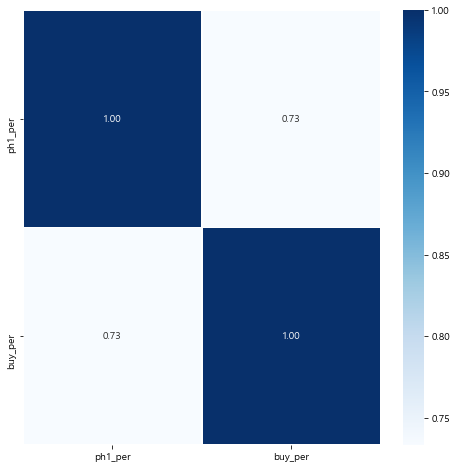

In [126]:
sns.heatmap(data = cor_table.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

3. buy 데이터를 이용한 2020년 업종 분석

In [188]:
buy_19_end = buy1[buy1['이용일자'].isin(['2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09'])]
buy_19_end.info() 
buy_19_end.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3171 entries, 0 to 3170
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   이용일자        3171 non-null   object  
 1   업종대분류       3171 non-null   category
 2   카드결제건수(천건)  3171 non-null   int64   
dtypes: category(1), int64(1), object(1)
memory usage: 78.1+ KB


,이용일자,업종대분류,카드결제건수(천건)
0,2019-01,가전/가구,149
1,2019-01,가정생활/서비스,189
2,2019-01,교육/학원,142
3,2019-01,미용,464
4,2019-01,스포츠/문화/레저,1752


In [197]:
buy_2019_1 = pd.DataFrame({'업종대분류':['유통','요식/유흥','의료','주유','스포츠/문화/레저','음/식료품', '가정생활/서비스','미용','패션/잡화','자동차','교육/학원','가전/가구','여행/교통'],
                             '카드결제건수(천건)':[3380596,2754531,597521,530406,395531,368699,135797,131615,114385,94085,89085,75245,53119]})
buy_2019_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   업종대분류       13 non-null     object
 1   카드결제건수(천건)  13 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 336.0+ bytes


In [190]:
buy_19_end=buy_19_end['카드결제건수(천건)'].groupby(buy_19_end['업종대분류']).agg('sum')
buy_19_end=pd.DataFrame(buy_19_end)
buy_19_end.sort_values('카드결제건수(천건)',ascending=False)

,카드결제건수(천건)
업종대분류,
유통,3380596
요식/유흥,2754531
의료,597521
주유,530406
스포츠/문화/레저,395531
음/식료품,368699
가정생활/서비스,135797
미용,131615
패션/잡화,114385


In [191]:
buy_19_end_per = buy_19_end['카드결제건수(천건)'].sum()
buy_19_end['buy_per_2019'] = buy_19_end /buy_19_end_per
buy_19_end.sort_values('카드결제건수(천건)',ascending=False)

,카드결제건수(천건),buy_per_2019
업종대분류,,
유통,3380596,0.387656
요식/유흥,2754531,0.315864
의료,597521,0.068518
주유,530406,0.060822
스포츠/문화/레저,395531,0.045356
음/식료품,368699,0.042279
가정생활/서비스,135797,0.015572
미용,131615,0.015092
패션/잡화,114385,0.013117


In [192]:
buy_20_front = buy1[buy1['이용일자'].isin(['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06'])]
buy_20_front.info() 
buy_20_front.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2367 entries, 3171 to 5537
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   이용일자        2367 non-null   object  
 1   업종대분류       2367 non-null   category
 2   카드결제건수(천건)  2367 non-null   int64   
dtypes: category(1), int64(1), object(1)
memory usage: 58.5+ KB


,이용일자,업종대분류,카드결제건수(천건)
3171,2020-01,패션/잡화,519
3172,2020-01,가전/가구,158
3173,2020-01,가정생활/서비스,197
3174,2020-01,교육/학원,145
3175,2020-01,미용,464


In [196]:
buy_2020_1 = pd.DataFrame({'업종대분류':['유통','요식/유흥','의료','주유','스포츠/문화/레저','음/식료품', '가정생활/서비스','미용','패션/잡화','자동차','교육/학원','가전/가구','여행/교통'],
                             '카드결제건수(천건)':[2329865,1833133,464885,360024,285704,241967,102641,79864,70653,65154,56117,52728,25165]})
buy_2020_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   업종대분류       13 non-null     object
 1   카드결제건수(천건)  13 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 336.0+ bytes


In [137]:
buy_20_front=buy_20_front['카드결제건수(천건)'].groupby(buy_20_front['업종대분류']).agg('sum')
buy_20_front=pd.DataFrame(buy_20_front)
buy_20_front.sort_values('카드결제건수(천건)',ascending=False)

,카드결제건수(천건)
업종대분류,
유통,2329865
요식/유흥,1833133
의료,464885
주유,360024
음/식료품,285704
스포츠/문화/레저,241967
가정생활/서비스,102641
미용,79864
패션/잡화,70653


In [159]:
buy_20_front_per = buy_20_front['카드결제건수(천건)'].sum()
buy_20_front['buy_per_2020'] = buy_20_front /buy_20_front_per
buy_20_front.sort_values('카드결제건수(천건)',ascending=False)

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 13 entries, 가전/가구 to 패션/잡화
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   카드결제건수(천건)    13 non-null     int64  
 1   buy_per_2020  13 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 965.0 bytes


In [143]:
buy_19 = buy_19_end[['buy_per_2019']]
buy_20 = buy_20_front[['buy_per_2020']]

In [144]:
buy_cor_table=pd.concat([buy_19,buy_20], axis =1)

In [145]:
buy_cor_table = buy_cor_table.fillna(0.000000)

In [146]:
buy_cor_table

,buy_per_2019,buy_per_2020
업종대분류,,
가전/가구,0.008628,0.008835
가정생활/서비스,0.015572,0.017199
교육/학원,0.010215,0.009403
미용,0.015092,0.013382
스포츠/문화/레저,0.045356,0.040545
여행/교통,0.006091,0.004217
요식/유흥,0.315864,0.307166
유통,0.387656,0.390399
음/식료품,0.042279,0.047873


In [148]:
#공분산
buy_cor_table.buy_per_2019.cov(buy_cor_table.buy_per_2020)

0.015437545066187573

In [149]:
#상관계수
buy_cor_table.buy_per_2019.corr(buy_cor_table.buy_per_2020)

0.9993735685313495

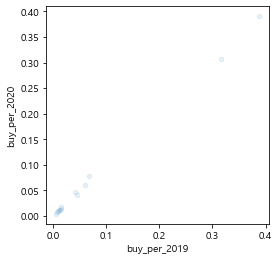

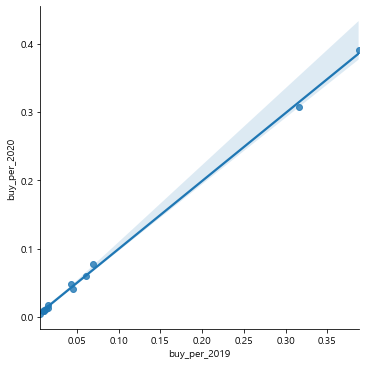

In [194]:
fig, ax = plt.subplots(figsize =(4,4))
buy_cor_table.plot.scatter(
    x='buy_per_2019',
    y='buy_per_2020',
    alpha =.1,
    ax=ax
)
res = sns.lmplot(
    x='buy_per_2019', y ='buy_per_2020', data =buy_cor_table
)

In [224]:
result_2020 = pd.merge(buy_2019_1,buy_2020_1,how='outer',on='업종대분류')

In [252]:
result_2020.columns = ['업종대분류', 'buy2019', 'buy2020']
result_2020.set_index("업종대분류")

,buy2019,buy2020
업종대분류,,
유통,3380596,2329865
요식/유흥,2754531,1833133
의료,597521,464885
주유,530406,360024
스포츠/문화/레저,395531,285704
음/식료품,368699,241967
가정생활/서비스,135797,102641
미용,131615,79864
패션/잡화,114385,70653


In [208]:
result_2020.buy2019.cov(result_2020.buy2020)

803525659461.3654

In [209]:
result_2020.buy2019.corr(result_2020.buy2020)

0.9994952156312162

<AxesSubplot:xlabel='buy2019', ylabel='buy2020'>

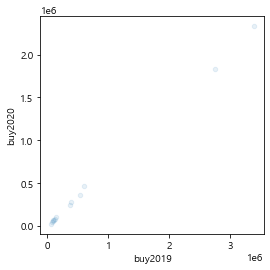

In [212]:
fig, ax = plt.subplots(figsize =(4,4))
result_2020.plot.scatter(
    x='buy2019',
    y='buy2020',
    alpha =.1,
    ax=ax
)

<AxesSubplot:>

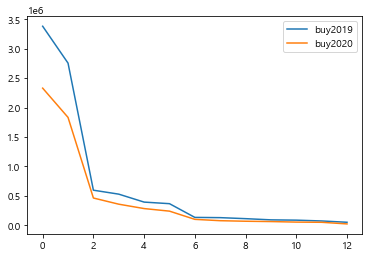

In [256]:
# 비율이든, 값이든 시각화과 같음
result_2020.plot()

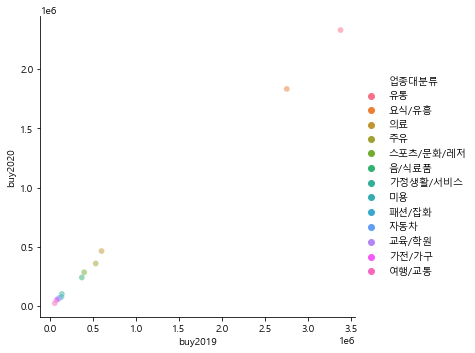

In [244]:
sns.relplot(
    x='buy2019',
    y='buy2020',
    data=result_2020,
    hue='업종대분류',
    alpha =.5
)

### 소비 업종에 대한 결론 

각 업종별 높은 비율들이 99%퍼센트로 일치하므로, 2019-> 2020년의 업종 변화는 이루어지지 않았다고 볼 수 있다.
그치만,  둘의 연관성과  시각화를 통해 2019년 보다 2020년의 업종 소비들이 많이 일어나고 있음을 알 수 있다.